# KDD Hands on tutorial, Barcelona 2024

# An Introduction to Time Series Classification (TSC) and Regression (TSER)

This is the notebook associated with the introduction to the hands-on tutorial on time series classification and regression. The tutorial website is [here](https://aeon-tutorials.github.io/KDD-2024/) and the structure is listed [here](https://aeon-tutorials.github.io/KDD-2024/schedule.html). There are ten sections, with a separate notebook for each section. The sections are:

1. Introduction to Time Series Classification and Regression (this notebook)
2. [Distance based](./part2_distance_based.ipynb)
3. [Convolution based](./part3_convolution_based.ipynb)
4. [Feature based](./part4_feature_based.ipynb)
5. [Interval based](./part5_interval_based.ipynb)
6. [Dictionary based](./part6_dictionary_based.ipynb)
7. [Deep learning based](./part7_deep_learning_based.ipynb)
8. [Shapelet based](./part8_shapelet_based.ipynb)
9. [Hybrids](./part9_hybrids.ipynb)
10. [Conclusions and future directions](./part10_conclusions.ipynb)


In [1]:
# There are some deprecation warnings present in the notebook, we will ignore them.
# Remove this cell if you are interested in finding out what is changing soon, for
# aeon there will be big changes in out v1.0.0 release!
import warnings

warnings.filterwarnings("ignore")

## `aeon` toolkit for TSC and TSER

The tutorial uses the `aeon` toolkit for machine learning from time series data. `aeon` is a `scikit-learn` compatible toolkit for time series machine learning (TSML). It is organised into
modules for different learning tasks: classification, regression, clustering, forecasting, anomaly detection, segmentation and similarity search. It also has building block modules for distances, networks and transformations.

This tutorial is concerned with the classification and regression modules. These use collections of time series to train and test models. `aeon` has a large number of introductory notebooks available in the [documentation](https://www.aeon-toolkit.org/en/stable/). We only cover the basics here.

If you have any questions, please feel free to join our Slack and ask. Links are availalble on the README. Time for questions and a chat will also be available during the tutorial itself.

In the following we load and showcase our example EEG datasets. All the datatypes used are 3D numpy arrays.

## Data structures and data sets

`aeon` assumes a single time series is a 2D numpy array of shape `(n_channels, n_timepoints)`. Classifiers and regressors take input collections of time series (and inherit from `BaseCollectionEstimator`). If the series are all equal length, works best with 3D numpy shape `(n_cases, n_channels, n_timepoints)`. Unequal length series are stored in lists of 2D numpy, but the examples we are going to use will be equal length.

This tutorial will use EEG data as a working example. The classification dataset is
made of EEG readings taken from a subject when at rest or when performing a set task
(raising arms). Full info on this data can be found in the `aeon-neuro` [notebook]
(https://github.com/aeon-toolkit/aeon-neuro/blob/main/examples/data_loading.ipynb).
Please do not over interpret any results from this data, it is a simple toy problem to demonstrate functionality.

`aeon` ships with some standard UCR and UEA datasets, and can download them all
directly from [timeseriesclassification.com](timeseriesclassification.com).

In [2]:
from aeon.datasets import load_from_tsfile

# Load the univariate EEG TSC dataset as a 3D numpy array
X_train_utsc, y_train_utsc = load_from_tsfile("./data/KDD_UTSC_TRAIN.ts")
X_test_utsc, y_test_utsc = load_from_tsfile("./data/KDD_UTSC_TEST.ts")

print("Single channel EEG TSC problem train shape:", X_train_utsc.shape)
print("Single channel EEG TSC problem test shape:", X_test_utsc.shape)

Single channel EEG TSC problem train shape: (40, 1, 100)
Single channel EEG TSC problem test shape: (40, 1, 100)


In [3]:
# Load the multivariate EEG TSC dataset as a 3D numpy array
X_train_mtsc, y_train_mtsc = load_from_tsfile("./data/KDD_MTSC_TRAIN.ts")
X_test_mtsc, y_test_mtsc = load_from_tsfile("./data/KDD_MTSC_TEST.ts")

print("Four channel EEG TSC problem train shape:", X_train_mtsc.shape)
print("Single channel EEG TSC problem test shape:", X_test_mtsc.shape)

Four channel EEG TSC problem train shape: (40, 4, 100)
Single channel EEG TSC problem test shape: (40, 4, 100)


In [4]:
# Load the univariate EEG TSER dataset as a 3D numpy array
X_train_utser, y_train_utser = load_from_tsfile("./data/KDD_UTSER_TRAIN.ts")
X_test_utser, y_test_utser = load_from_tsfile("./data/KDD_UTSER_TEST.ts")

print("Single channel EEG TSER problem train shape:", X_train_utsc.shape)
print("Single channel EEG TSER problem test shape:", X_test_utsc.shape)

Single channel EEG TSER problem train shape: (40, 1, 100)
Single channel EEG TSER problem test shape: (40, 1, 100)


In [5]:
# Load the multivariate EEG TSER dataset as a 3D numpy array
X_train_mtser, y_train_mtser = load_from_tsfile("./data/KDD_MTSER_TRAIN.ts")
X_test_mtser, y_test_mtser = load_from_tsfile("./data/KDD_MTSER_TEST.ts")

print("Four channel EEG TSER problem train shape:", X_train_mtser.shape)
print("Single channel EEG TSER problem test shape:", X_test_mtser.shape)

Four channel EEG TSER problem train shape: (72, 4, 100)
Single channel EEG TSER problem test shape: (72, 4, 100)


Here we plot each channel for the classification and regression data set. For classification we split each case by class value.

(<Figure size 1200x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

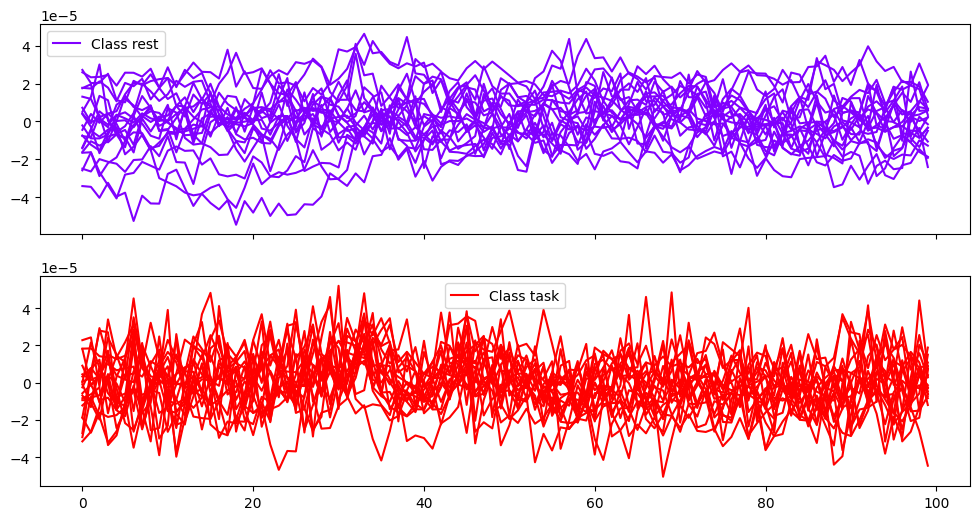

In [6]:
from aeon.visualisation.series._collections import plot_collection_by_class

plot_collection_by_class(X_train_mtsc[:, 0, :], y_train_utsc)

(<Figure size 1200x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

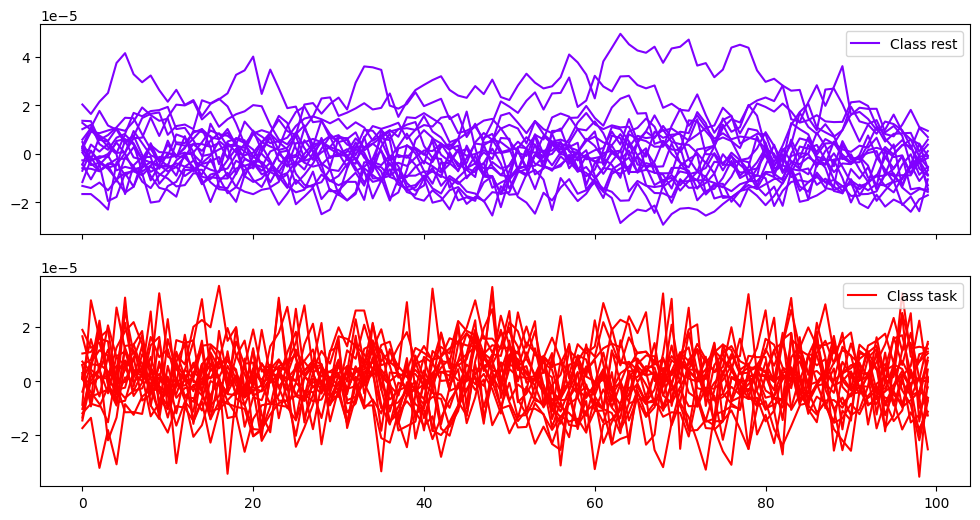

In [7]:
plot_collection_by_class(X_train_mtsc[:, 1, :], y_train_utsc)

(<Figure size 1200x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

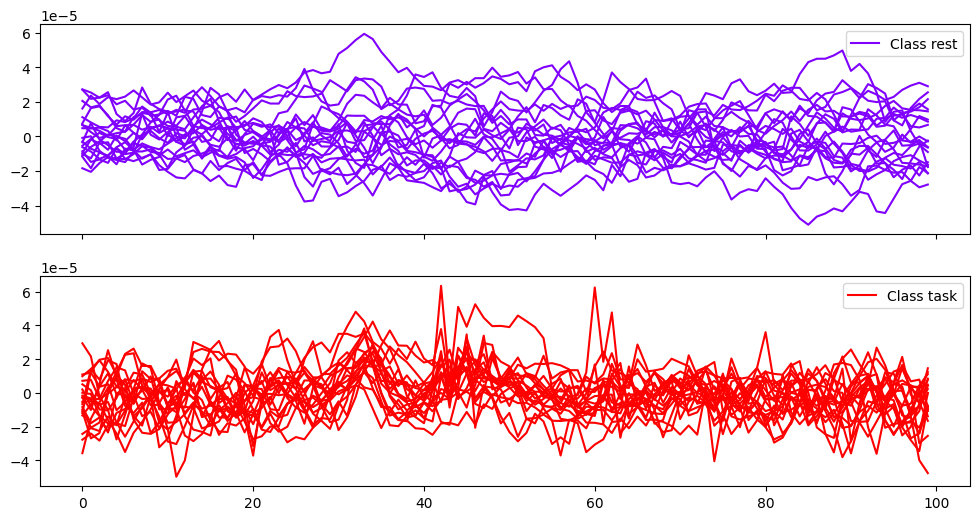

In [8]:
plot_collection_by_class(X_train_mtsc[:, 2, :], y_train_utsc)

(<Figure size 1200x600 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

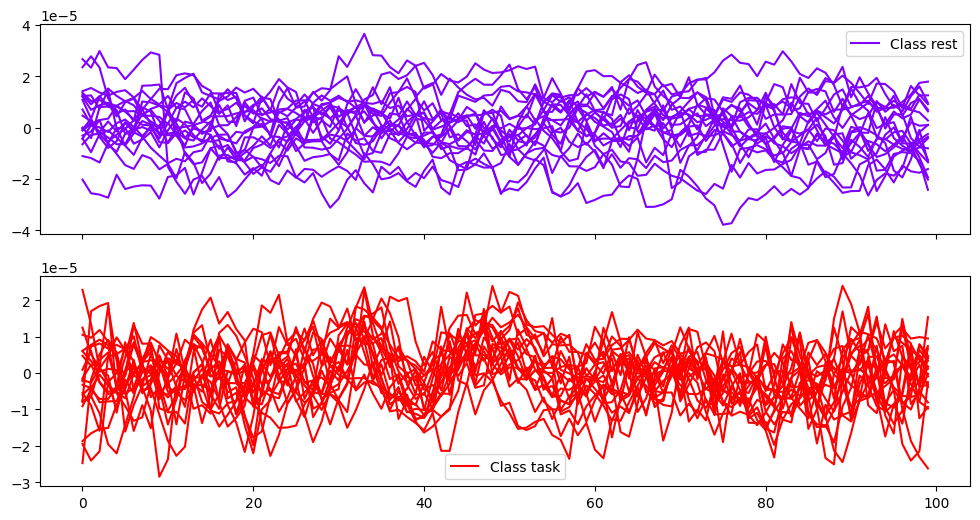

In [9]:
plot_collection_by_class(X_train_mtsc[:, 3, :], y_train_utsc)

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

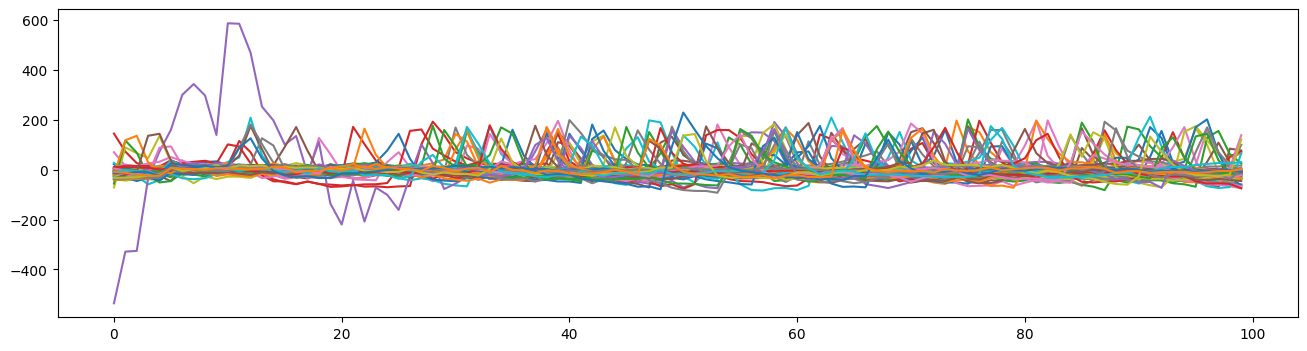

In [10]:
from aeon.visualisation.series._collections import plot_series_collection

plot_series_collection(X_test_mtser[:, 0, :])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

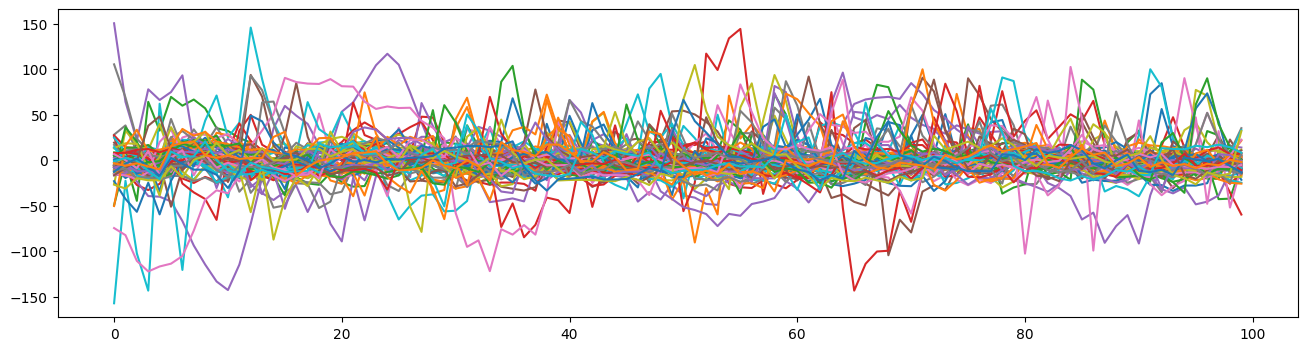

In [11]:
plot_series_collection(X_test_mtser[:, 1, :])

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

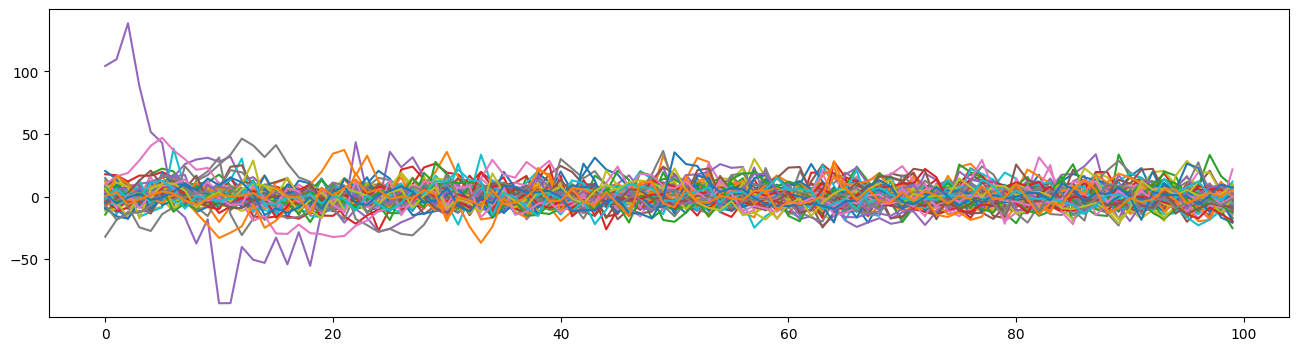

In [12]:
plot_series_collection(X_test_mtser[:, 2, :])

In [ ]:
plot_series_collection(X_test_mtser[:, 3, :])

## Basic estimator workflow

`aeon` follows the `scikit-learn` interface. Classifier and regressor classes can be built using `fit`, and then prediction for new cases can be made using `predict`.

In [13]:
from aeon.classification.convolution_based import RocketClassifier
from sklearn.metrics import accuracy_score

rc = RocketClassifier(rocket_transform="minirocket")
rc.fit(X_train_utsc, y_train_utsc)
pred1 = rc.predict(X_test_utsc)
accuracy_score(y_test_utsc, pred1)

Rocket classifier accuracy: 0.8
Rocket regressor MSE: 0.8994174201723373


In [ ]:
from aeon.regression.convolution_based import RocketRegressor
from sklearn.metrics import mean_squared_error

rr = RocketRegressor(rocket_transform="minirocket")
rr.fit(X_train_utser, y_train_utser)
pred2 = rr.predict(X_test_utser)
mean_squared_error(y_test_utser, pred2)

## `sklearn` like classification and regression

`aeon` classifiers and regressors can be used in `scikit-learn` such as pipelines and tuning. Here is an example where we convert the data into autoregressive terms and construct a runed Rocket classifier on this data.

In [14]:
from aeon.transformations.collection import AutocorrelationFunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

pipe = make_pipeline(AutocorrelationFunctionTransformer(n_lags=25), RocketClassifier(rocket_transform="minirocket"))
param_grid = {'rocketclassifier__num_kernels': [5000, 10000, 15000]}
grid = GridSearchCV(pipe, param_grid, cv=3)
grid.fit(X_train_utsc, y_train_utsc)
grid.best_params_

{'rocketclassifier__num_kernels': 5000}
Rocket classifier accuracy: 0.5


In [ ]:
preds = grid.predict(X_test_utsc)
accuracy_score(y_test_utsc, preds)

## Further information

There is a lot of information avaiable in the `aeon` documentation.

[`aeon` webpage](https://www.aeon-toolkit.org/en/stable/)

[classification notebook](https://www.aeon-toolkit.org/en/stable/examples/classification/classification.html)

[classification examples](https://www.aeon-toolkit.org/en/stable/examples.html)

[Regression notebook](https://www.aeon-toolkit.org/en/stable/examples/regression/regression.html)

You can get results published in bake offs directly using aeon.

[Getting published results directly](https://www.aeon-toolkit.org/en/stable/examples/benchmarking/bakeoff_results.html)

More info on benchmarking

[benchmarking](https://www.aeon-toolkit.org/en/stable/examples/benchmarking/benchmarking.html)

If you find anything wrong or unclear in the aeon documentation, please raise an issue on GitHub or mention it on Slack, we welcome new contributors.




